## Example using IRIS dataset

In [1]:
import os
import shutil
import tempfile
import unittest
import pandas as pd
import seaborn as snsx
import matplotlib.pyplot as plt
import numpy as np

from scivae import *
from sciviso import *

# Set the location of the mnist data
data_dir = 'scivae_copy/tests/data/'
loss = {'loss_type': 'mse', 'distance_metric': 'mmd', 'mmd_weight': 1}
encoding = {'layers':[{'num_nodes': 3, 'activation_fn': 'selu'}]} 
decoding = {'layers': [{'num_nodes': 3, 'activation_fn': 'selu'}]}
latent = {'num_nodes': 2}
optimisers = {'name': 'adam', 'params': {}}

config = {'loss': loss, 'encoding': encoding, 'decoding': decoding, 'latent': latent, 'optimiser': optimisers}

# Path to the data
data = f'{data_dir}iris.csv'

# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)

# Set up what the columns are
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)


/home/n10853499/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/n10853499/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/n10853499/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/n10853499/.conda/envs/tensor

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
default_input (InputLayer)      (None, 4)            0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 3)            15          default_input[0][0]              
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 3)            12          dense[0][0]                      
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            8           batch_normalization[0][0]        
__________________________________________________________________________________________________
z_log_sigm

AttributeError: module 'tensorflow._api.v1.keras.backend' has no attribute 'tile'

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train)

60000

## Visualise the latent space

Visualise and colour the latent space.


<AxesSubplot:title={'center':'Latent space coloured by class'}, xlabel='asd'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


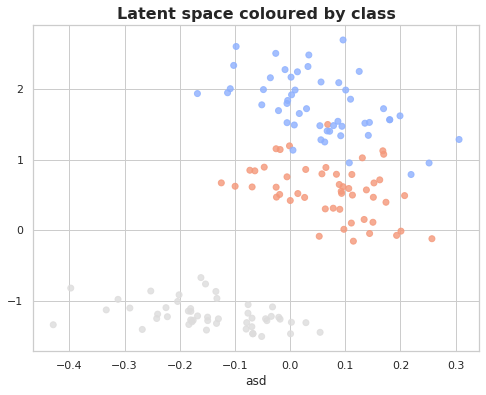

In [2]:
import seaborn as sns
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Latent space coloured by class', xlabel='asd')
scatter.plot()

## Print out the accuracy

Here we just get the accuracy of the encoding space when we use it as features for a classifier.

In [3]:

vd = Validate(vae, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.9210526315789473
0.9521367521367522


## Linear version of the same VAE

Here we just show that you can have a linear VAE.

In [4]:
# Use the same parameters as before except we get rid of the encoding and decoding layers
# This means it just goes straight to the encoding layer - hence a one layer VAE ~ linear.
encoding = {'layers':[]} 
decoding = {'layers': []}
config = {'loss': loss, 'encoding': encoding, 'decoding': decoding, 'latent': latent, 'optimiser': optimisers}


# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
lin_vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
lin_vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
lin_encoding = lin_vae.get_encoded_data()
lin_decoding = lin_vae.decoder.predict(lin_encoding)


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
default_input (InputLayer)      [(None, 4)]          0                                            
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            10          default_input[0][0]              
__________________________________________________________________________________________________
z_log_sigma (Dense)             (None, 2)            10          default_input[0][0]              
__________________________________________________________________________________________________
z (Lambda)                      (None, 2)            0           z_mean[0][0]                     
                                                                 z_log_sigma[0][0]          

3/3 [==============================] - 0s 98ms/step - loss: 4.7198 - val_loss: 0.4680
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 4.4196 - val_loss: 0.4423
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 4.0902 - val_loss: 0.4470
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 3.7548 - val_loss: 0.4679
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 3.4538 - val_loss: 0.4499
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 3.1647 - val_loss: 0.4394
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 2.9541 - val_loss: 0.5733
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 2.7881 - val_loss: 0.4473
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 2.4981 - val_loss: 0.4646
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 2.2905 - val_loss: 0.4804
Epoch 11/50
3/3 [==============================] 

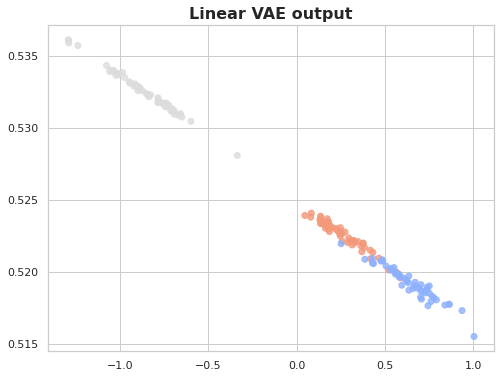

In [5]:
# Plot the linear VAE latent space
vis_df = pd.DataFrame()
vis_df['latent_0'] = lin_encoding[:, 0]
vis_df['latent_1'] = lin_decoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Linear VAE output')
scatter.plot()
plt.show()


## Look at the acuracy of linear VAE

Here let's have a look at the how accruate the linear VAE latent features are at predicting the class.

In [6]:

vd = Validate(lin_vae, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.9210526315789473
0.923076923076923
